In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image, HTML
import urllib.request
from urllib.request import urlopen
pd.set_option('display.max_columns', None)

import time
from datetime import datetime, timedelta

In [2]:
Survey1DF = pd.read_csv('/da4_data/play/trackhack/Analysis/SurveyData/survey1ResultsFinal.csv',sep=',', encoding = "ISO-8859-1")
Survey2DF = pd.read_csv('/da4_data/play/trackhack/Analysis/SurveyData/survey2ResultsFinal.csv',sep=',', encoding = "ISO-8859-1")
Survey3DF = pd.read_csv('/da4_data/play/trackhack/Analysis/SurveyData/survey3ResultsFinal.csv',sep=',', encoding = "ISO-8859-1")


In [3]:
Survey1DFOrig = Survey1DF.copy(deep=True)
Survey2DFOrig = Survey2DF.copy(deep=True)
Survey3DFOrig = Survey3DF.copy(deep=True)

## Data Cleaning

### Survey1

In [4]:
Survey1DF.columns = ['Response ID', 
	   'DateSubmitted', 
	   'LastPage', 
	   'StartLanguage', 
	   'Token',
       'IntroQ', 
	   'IntroQ2', 
	   'CommitAuthor',
       'CodeOrigin01',
       'CodeOrigin02',
       'CodeOrigin03',
       'CodeOrigin04',
       'CodeOrigin05',
       'CodeOrigin06',
       'CodeOrigin07',
       'CodeOrigin08',
       'CodeOrigin09',
       'CodeOrigin10',
       'Useful01',
       'Useful02',
       'Useful03',
       'Useful04',
       'Useful05',
       'Useful06',
       'Useful07',
       'Reuse01',
       'Reuse02',
       'Reuse03',
       'Reuse04',
       'Reuse05',
       'Reuse06',
       'Reuse07',
       'Aware01',
       'Aware02',
       'Aware03',
       'Aware04',
       'Aware05',
       'Share01',
       'Share02',
       'Share03',
       'Share04',
       'IntroQ3',
       'Sat01',
       'Sat02',
       'Sat03',
       'Sat04',
       'Sat05',
       'Intention01',
       'Intention02',
       'Intention03',
       'RecallReuse',
       'AgeGroup', 
	   'Gender', 
	   'Minority', 
	   'Experience']

In [5]:
Survey1DF = Survey1DF[Survey1DF['Sat01'].notnull()].reset_index(drop=True)
Survey1DF = Survey1DF[Survey1DF['CommitAuthor'] == 'Yes'].reset_index(drop=True)
del Survey1DF['IntroQ']
del Survey1DF['IntroQ2']
del Survey1DF['IntroQ3']

Survey1DF

,Response ID,DateSubmitted,LastPage,StartLanguage,Token,CommitAuthor,CodeOrigin01,CodeOrigin02,CodeOrigin03,CodeOrigin04,CodeOrigin05,CodeOrigin06,CodeOrigin07,CodeOrigin08,CodeOrigin09,CodeOrigin10,Useful01,Useful02,Useful03,Useful04,Useful05,Useful06,Useful07,Reuse01,Reuse02,Reuse03,Reuse04,Reuse05,Reuse06,Reuse07,Aware01,Aware02,Aware03,Aware04,Aware05,Share01,Share02,Share03,Share04,Sat01,Sat02,Sat03,Sat04,Sat05,Intention01,Intention02,Intention03,RecallReuse,AgeGroup,Gender,Minority,Experience
0,1,1980-01-01 00:00:00,4.0,en,BsfZww05Po1xkqA,Yes,Yes,Yes,Yes,Yes,No,No,No,No,No,NaN,No,No,No,No,Yes,No,NaN,Yes,No,Yes,Yes,No,No,NaN,No,No,No,Yes,NaN,No,No,Yes,NaN,Stronglyagree,Stronglyagree,Stronglyagree,Stronglyagree,Neither agreenor disagree,Stronglyagree,Somewhatdisagree,Stronglyagree,Yes,25 to 34,Male,Yes,5+
1,3,1980-01-01 00:00:00,4.0,en,B1FXzNmisG6wFFU,Yes,No,No,No,No,No,No,No,No,Yes,NaN,No,No,No,No,Yes,No,NaN,No,No,No,No,No,Yes,NaN,No,No,No,Yes,NaN,No,No,Yes,NaN,Somewhatagree,Somewhatagree,Somewhatagree,Somewhatagree,Somewhatagree,Stronglydisagree,Stronglydisagree,Stronglydisagree,Not Sure,18 to 24,Female,Yes,1
2,4,1980-01-01 00:00:00,4.0,en,qEdFz5StzMXcxHa,Yes,Yes,No,No,No,No,No,No,No,No,NaN,No,No,No,No,Yes,No,NaN,Yes,No,No,No,No,No,NaN,No,No,No,Yes,NaN,No,No,Yes,NaN,Stronglyagree,Stronglyagree,Somewhatagree,Stronglyagree,Somewhatdisagree,Stronglydisagree,Stronglydisagree,Stronglydisagree,Not Sure,25 to 34,Male,Rather not say,2
3,10,1980-01-01 00:00:00,4.0,en,wd7XrdPoomWc0DH,Yes,Yes,No,No,No,No,No,Yes,No,No,NaN,No,No,Yes,No,No,No,NaN,No,No,No,No,No,Yes,NaN,No,No,No,Yes,NaN,Yes,No,No,NaN,Stronglyagree,Stronglyagree,Stronglyagree,Stronglyagree,Stronglyagree,Stronglyagree,Stronglyagree,Stronglyagree,Not Sure,25 to 34,Female,No,1
4,31,1980-01-01 00:00:00,4.0,en,V5xlTIQ1kJbz3DM,Yes,Yes,No,Yes,No,No,No,Yes,No,No,NaN,No,No,Yes,Yes,No,No,NaN,No,No,No,No,Yes,No,NaN,No,No,No,Yes,NaN,No,No,Yes,NaN,Somewhatagree,Somewhatagree,Stronglyagree,Stronglyagree,Somewhatagree,Stronglydisagree,Stronglydisagree,Stronglydisagree,Yes,25 to 34,Male,No,5+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,548,1980-01-01 00:00:00,4.0,en,sobK2qTYPg6TFvA,Yes,Yes,Yes,No,Yes,No,No,Yes,No,No,NaN,No,No,Yes,Yes,No,No,NaN,No,No,No,Yes,No,No,NaN,No,No,No,Yes,NaN,No,Yes,No,NaN,Somewhatagree,Somewhatagree,Neither agreenor disagree,Neither agreenor disagree,Somewhatagree,Stronglydisagree,Stronglydisagree,Stronglydisagree,Yes,18 to 24,Female,No,2
174,555,1980-01-01 00:00:00,4.0,en,CclUF74vSBYZLkz,Yes,Yes,No,No,No,No,No,No,No,No,NaN,No,No,No,Yes,No,No,NaN,Yes,No,No,Yes,No,No,NaN,Yes,No,No,No,NaN,No,No,Yes,NaN,Stronglyagree,Stronglyagree,Neither agreenor disagree,Somewhatagree,Stronglyagree,Somewhatdisagree,Somewhatdisagree,Stronglyagree,Yes,25 to 34,Female,Yes,3
175,556,1980-01-01 00:00:00,4.0,en,qkVzPJU6PiGsfN5,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Datasets from The Fake News Competition (FNC),No,No,Yes,No,No,No,NaN,No,No,No,No,Yes,No,NaN,No,No,Yes,No,NaN,No,Yes,No,NaN,Stronglyagree,Stronglyagree,Stronglyagree,Stronglyagree,Somewhatdisagree,Stronglydisagree,Stronglydisagree,Stronglydisagree,Yes,18 to 24,Male,No,4
176,557,1980-01-01 00:00:00,4.0,en,x4aOsTO0SznHdVe,Yes,No,No,No,No,No,Yes,No,No,No,NaN,No,No,No,No,Yes,No,NaN,No,No,No,No,No,Yes,NaN,No,No,No,Yes,NaN,No,No,Yes,NaN,Stronglyagree,Stronglyagree,Stronglyagree,Stronglyagree,Stronglyagree,Somewhatdisagree,Somewhatdisagree,Somewhatdisagree,Yes,25 to 34,Male,No,NaN


In [6]:
Survey1DF = Survey1DF.replace(to_replace=['No', 'Yes'], value=[0, 1])
Survey1DF

,Response ID,DateSubmitted,LastPage,StartLanguage,Token,CommitAuthor,CodeOrigin01,CodeOrigin02,CodeOrigin03,CodeOrigin04,CodeOrigin05,CodeOrigin06,CodeOrigin07,CodeOrigin08,CodeOrigin09,CodeOrigin10,Useful01,Useful02,Useful03,Useful04,Useful05,Useful06,Useful07,Reuse01,Reuse02,Reuse03,Reuse04,Reuse05,Reuse06,Reuse07,Aware01,Aware02,Aware03,Aware04,Aware05,Share01,Share02,Share03,Share04,Sat01,Sat02,Sat03,Sat04,Sat05,Intention01,Intention02,Intention03,RecallReuse,AgeGroup,Gender,Minority,Experience
0,1,1980-01-01 00:00:00,4.0,en,BsfZww05Po1xkqA,1,1,1,1,1,0,0,0,0,0,NaN,0,0,0,0,1,0,NaN,1,0,1,1,0,0,NaN,0,0,0,1,NaN,0,0,1,NaN,Stronglyagree,Stronglyagree,Stronglyagree,Stronglyagree,Neither agreenor disagree,Stronglyagree,Somewhatdisagree,Stronglyagree,1,25 to 34,Male,1,5+
1,3,1980-01-01 00:00:00,4.0,en,B1FXzNmisG6wFFU,1,0,0,0,0,0,0,0,0,1,NaN,0,0,0,0,1,0,NaN,0,0,0,0,0,1,NaN,0,0,0,1,NaN,0,0,1,NaN,Somewhatagree,Somewhatagree,Somewhatagree,Somewhatagree,Somewhatagree,Stronglydisagree,Stronglydisagree,Stronglydisagree,Not Sure,18 to 24,Female,1,1
2,4,1980-01-01 00:00:00,4.0,en,qEdFz5StzMXcxHa,1,1,0,0,0,0,0,0,0,0,NaN,0,0,0,0,1,0,NaN,1,0,0,0,0,0,NaN,0,0,0,1,NaN,0,0,1,NaN,Stronglyagree,Stronglyagree,Somewhatagree,Stronglyagree,Somewhatdisagree,Stronglydisagree,Stronglydisagree,Stronglydisagree,Not Sure,25 to 34,Male,Rather not say,2
3,10,1980-01-01 00:00:00,4.0,en,wd7XrdPoomWc0DH,1,1,0,0,0,0,0,1,0,0,NaN,0,0,1,0,0,0,NaN,0,0,0,0,0,1,NaN,0,0,0,1,NaN,1,0,0,NaN,Stronglyagree,Stronglyagree,Stronglyagree,Stronglyagree,Stronglyagree,Stronglyagree,Stronglyagree,Stronglyagree,Not Sure,25 to 34,Female,0,1
4,31,1980-01-01 00:00:00,4.0,en,V5xlTIQ1kJbz3DM,1,1,0,1,0,0,0,1,0,0,NaN,0,0,1,1,0,0,NaN,0,0,0,0,1,0,NaN,0,0,0,1,NaN,0,0,1,NaN,Somewhatagree,Somewhatagree,Stronglyagree,Stronglyagree,Somewhatagree,Stronglydisagree,Stronglydisagree,Stronglydisagree,1,25 to 34,Male,0,5+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,548,1980-01-01 00:00:00,4.0,en,sobK2qTYPg6TFvA,1,1,1,0,1,0,0,1,0,0,NaN,0,0,1,1,0,0,NaN,0,0,0,1,0,0,NaN,0,0,0,1,NaN,0,1,0,NaN,Somewhatagree,Somewhatagree,Neither agreenor disagree,Neither agreenor disagree,Somewhatagree,Stronglydisagree,Stronglydisagree,Stronglydisagree,1,18 to 24,Female,0,2
174,555,1980-01-01 00:00:00,4.0,en,CclUF74vSBYZLkz,1,1,0,0,0,0,0,0,0,0,NaN,0,0,0,1,0,0,NaN,1,0,0,1,0,0,NaN,1,0,0,0,NaN,0,0,1,NaN,Stronglyagree,Stronglyagree,Neither agreenor disagree,Somewhatagree,Stronglyagree,Somewhatdisagree,Somewhatdisagree,Stronglyagree,1,25 to 34,Female,1,3
175,556,1980-01-01 00:00:00,4.0,en,qkVzPJU6PiGsfN5,1,1,0,1,0,0,0,1,1,0,Datasets from The Fake News Competition (FNC),0,0,1,0,0,0,NaN,0,0,0,0,1,0,NaN,0,0,1,0,NaN,0,1,0,NaN,Stronglyagree,Stronglyagree,Stronglyagree,Stronglyagree,Somewhatdisagree,Stronglydisagree,Stronglydisagree,Stronglydisagree,1,18 to 24,Male,0,4
176,557,1980-01-01 00:00:00,4.0,en,x4aOsTO0SznHdVe,1,0,0,0,0,0,1,0,0,0,NaN,0,0,0,0,1,0,NaN,0,0,0,0,0,1,NaN,0,0,0,1,NaN,0,0,1,NaN,Stronglyagree,Stronglyagree,Stronglyagree,Stronglyagree,Stronglyagree,Somewhatdisagree,Somewhatdisagree,Somewhatdisagree,1,25 to 34,Male,0,NaN


In [7]:
set(Survey1DF['Experience'])

{'1', '2', '3', '4', '5+', nan}

In [8]:
Survey1DF['Sat01'] = Survey1DF.Sat01.replace(to_replace=['Stronglyagree', 'Somewhatagree','Neither agreenor disagree','Somewhatdisagree','Stronglydisagree'], value=[5,4,3,2,1])
Survey1DF['Sat02'] = Survey1DF.Sat02.replace(to_replace=['Stronglyagree', 'Somewhatagree','Neither agreenor disagree','Somewhatdisagree','Stronglydisagree'], value=[5,4,3,2,1])
Survey1DF['Sat03'] = Survey1DF.Sat03.replace(to_replace=['Stronglyagree', 'Somewhatagree','Neither agreenor disagree','Somewhatdisagree','Stronglydisagree'], value=[5,4,3,2,1])
Survey1DF['Sat04'] = Survey1DF.Sat04.replace(to_replace=['Stronglyagree', 'Somewhatagree','Neither agreenor disagree','Somewhatdisagree','Stronglydisagree'], value=[5,4,3,2,1])
Survey1DF['Sat05'] = Survey1DF.Sat05.replace(to_replace=['Stronglyagree', 'Somewhatagree','Neither agreenor disagree','Somewhatdisagree','Stronglydisagree'], value=[1,2,3,4,5])

Survey1DF['Intention01'] = Survey1DF.Intention01.replace(to_replace=['Stronglyagree', 'Somewhatagree','Neither agreenor disagree','Somewhatdisagree','Stronglydisagree'], value=[5,4,3,2,1])
Survey1DF['Intention02'] = Survey1DF.Intention02.replace(to_replace=['Stronglyagree', 'Somewhatagree','Neither agreenor disagree','Somewhatdisagree','Stronglydisagree'], value=[5,4,3,2,1])
Survey1DF['Intention03'] = Survey1DF.Intention03.replace(to_replace=['Stronglyagree', 'Somewhatagree','Neither agreenor disagree','Somewhatdisagree','Stronglydisagree'], value=[5,4,3,2,1])

Survey1DF['AgeGroup'] = Survey1DF.AgeGroup.replace(to_replace=['18 to 24', '25 to 34', '35 to 44', '55 to 64'], value=[1,2,3,4])
Survey1DF['Gender'] = Survey1DF.Gender.replace(to_replace=['Female', 'Male', 'Prefer not to say','Non-binary'], value=[1,2,3,4])
Survey1DF['Experience'] = Survey1DF.Experience.replace(to_replace=['1', '2', '3', '4', '5+'], value=[1,2,3,4,5])


Survey1DF

,Response ID,DateSubmitted,LastPage,StartLanguage,Token,CommitAuthor,CodeOrigin01,CodeOrigin02,CodeOrigin03,CodeOrigin04,CodeOrigin05,CodeOrigin06,CodeOrigin07,CodeOrigin08,CodeOrigin09,CodeOrigin10,Useful01,Useful02,Useful03,Useful04,Useful05,Useful06,Useful07,Reuse01,Reuse02,Reuse03,Reuse04,Reuse05,Reuse06,Reuse07,Aware01,Aware02,Aware03,Aware04,Aware05,Share01,Share02,Share03,Share04,Sat01,Sat02,Sat03,Sat04,Sat05,Intention01,Intention02,Intention03,RecallReuse,AgeGroup,Gender,Minority,Experience
0,1,1980-01-01 00:00:00,4.0,en,BsfZww05Po1xkqA,1,1,1,1,1,0,0,0,0,0,NaN,0,0,0,0,1,0,NaN,1,0,1,1,0,0,NaN,0,0,0,1,NaN,0,0,1,NaN,5,5.0,5,5.0,3.0,5.0,2.0,5.0,1,2,2.0,1,5.0
1,3,1980-01-01 00:00:00,4.0,en,B1FXzNmisG6wFFU,1,0,0,0,0,0,0,0,0,1,NaN,0,0,0,0,1,0,NaN,0,0,0,0,0,1,NaN,0,0,0,1,NaN,0,0,1,NaN,4,4.0,4,4.0,2.0,1.0,1.0,1.0,Not Sure,1,1.0,1,1.0
2,4,1980-01-01 00:00:00,4.0,en,qEdFz5StzMXcxHa,1,1,0,0,0,0,0,0,0,0,NaN,0,0,0,0,1,0,NaN,1,0,0,0,0,0,NaN,0,0,0,1,NaN,0,0,1,NaN,5,5.0,4,5.0,4.0,1.0,1.0,1.0,Not Sure,2,2.0,Rather not say,2.0
3,10,1980-01-01 00:00:00,4.0,en,wd7XrdPoomWc0DH,1,1,0,0,0,0,0,1,0,0,NaN,0,0,1,0,0,0,NaN,0,0,0,0,0,1,NaN,0,0,0,1,NaN,1,0,0,NaN,5,5.0,5,5.0,1.0,5.0,5.0,5.0,Not Sure,2,1.0,0,1.0
4,31,1980-01-01 00:00:00,4.0,en,V5xlTIQ1kJbz3DM,1,1,0,1,0,0,0,1,0,0,NaN,0,0,1,1,0,0,NaN,0,0,0,0,1,0,NaN,0,0,0,1,NaN,0,0,1,NaN,4,4.0,5,5.0,2.0,1.0,1.0,1.0,1,2,2.0,0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,548,1980-01-01 00:00:00,4.0,en,sobK2qTYPg6TFvA,1,1,1,0,1,0,0,1,0,0,NaN,0,0,1,1,0,0,NaN,0,0,0,1,0,0,NaN,0,0,0,1,NaN,0,1,0,NaN,4,4.0,3,3.0,2.0,1.0,1.0,1.0,1,1,1.0,0,2.0
174,555,1980-01-01 00:00:00,4.0,en,CclUF74vSBYZLkz,1,1,0,0,0,0,0,0,0,0,NaN,0,0,0,1,0,0,NaN,1,0,0,1,0,0,NaN,1,0,0,0,NaN,0,0,1,NaN,5,5.0,3,4.0,1.0,2.0,2.0,5.0,1,2,1.0,1,3.0
175,556,1980-01-01 00:00:00,4.0,en,qkVzPJU6PiGsfN5,1,1,0,1,0,0,0,1,1,0,Datasets from The Fake News Competition (FNC),0,0,1,0,0,0,NaN,0,0,0,0,1,0,NaN,0,0,1,0,NaN,0,1,0,NaN,5,5.0,5,5.0,4.0,1.0,1.0,1.0,1,1,2.0,0,4.0
176,557,1980-01-01 00:00:00,4.0,en,x4aOsTO0SznHdVe,1,0,0,0,0,0,1,0,0,0,NaN,0,0,0,0,1,0,NaN,0,0,0,0,0,1,NaN,0,0,0,1,NaN,0,0,1,NaN,5,5.0,5,5.0,1.0,2.0,2.0,2.0,1,2,2.0,0,NaN


### Survey2

In [9]:
Survey2DF.columns = ['Response ID', 
	   'DateSubmitted', 
	   'LastPage', 
	   'StartLanguage', 
	   'Token',
       'IntroQ', 
	   'IntroQ2', 
	   'CommitAuthor',
       'CodeOrigin01',
       'CodeOrigin02',
       'CodeOrigin03',
       'CodeOrigin04',
       'CodeOrigin05',
       'CodeOrigin06',
       'CodeOrigin07',
       'CodeOrigin08',
       'CodeOrigin09',
       'CodeOrigin10',
       'Useful01',
       'Useful02',
       'Useful03',
       'Useful04',
       'Useful05',
       'Useful06',
       'Useful07',
       'Reuse01',
       'Reuse02',
       'Reuse03',
       'Reuse04',
       'Reuse05',
       'Reuse06',
       'Reuse07',
       'Aware01',
       'Aware02',
       'Aware03',
       'Aware04',
       'Aware05',
       'Share01',
       'Share02',
       'Share03',
       'Share04',
       'IntroQ3',
       'Sat01',
       'Sat02',
       'Sat03',
       'Sat04',
       'Sat05',
       'Intention01',
       'Intention02',
       'Intention03',
       'RecallReuse',
       'AgeGroup', 
	   'Gender', 
	   'Minority', 
	   'Experience']

In [10]:
Survey2DF

,Response ID,DateSubmitted,LastPage,StartLanguage,Token,IntroQ,IntroQ2,CommitAuthor,CodeOrigin01,CodeOrigin02,CodeOrigin03,CodeOrigin04,CodeOrigin05,CodeOrigin06,CodeOrigin07,CodeOrigin08,CodeOrigin09,CodeOrigin10,Useful01,Useful02,Useful03,Useful04,Useful05,Useful06,Useful07,Reuse01,Reuse02,Reuse03,Reuse04,Reuse05,Reuse06,Reuse07,Aware01,Aware02,Aware03,Aware04,Aware05,Share01,Share02,Share03,Share04,IntroQ3,Sat01,Sat02,Sat03,Sat04,Sat05,Intention01,Intention02,Intention03,RecallReuse,AgeGroup,Gender,Minority,Experience
0,1,NaN,NaN,en,PDNagvhDjzcMJLj,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,1.0,en,4d7Zv7mnawmKmSm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1980-01-01 00:00:00,4.0,en,55WraSop6zt12PH,NaN,NaN,Yes,Yes,No,No,No,No,No,Yes,No,No,NaN,No,No,Yes,Yes,No,No,NaN,No,No,No,No,Yes,No,NaN,No,No,No,Yes,NaN,No,No,Yes,NaN,NaN,Stronglyagree,Stronglyagree,Somewhatagree,Stronglyagree,Stronglydisagree,Stronglydisagree,Stronglydisagree,Stronglydisagree,Yes,18 to 24,Male,Yes,2
3,4,1980-01-01 00:00:00,4.0,en,2Jx79CItC1s95Nj,NaN,NaN,Yes,Yes,No,No,No,No,No,No,No,No,NaN,No,No,Yes,No,No,No,NaN,No,No,No,No,Yes,No,NaN,No,No,No,Yes,NaN,No,No,Yes,NaN,NaN,Stronglyagree,Stronglyagree,Stronglyagree,Stronglyagree,Stronglydisagree,Stronglydisagree,Stronglydisagree,Stronglydisagree,No,35 to 44,Male,No,5+
4,5,1980-01-01 00:00:00,4.0,en,wUkm8vXq1TtaiXV,NaN,NaN,Yes,Yes,No,No,No,No,No,No,Yes,No,NaN,No,No,No,Yes,No,No,NaN,No,No,No,No,No,Yes,NaN,No,No,No,Yes,NaN,No,No,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18 to 24,Male,No,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,336,1980-01-01 00:00:00,4.0,en,Ez55LLGj65YJiKE,NaN,NaN,Yes,Yes,No,No,No,No,No,Yes,No,No,NaN,No,No,Yes,No,No,No,NaN,No,No,No,No,Yes,No,NaN,No,No,No,Yes,NaN,No,No,Yes,NaN,NaN,Somewhatagree,Stronglyagree,Somewhatagree,Stronglyagree,Somewhatdisagree,Somewhatdisagree,Somewhatdisagree,Neither agreenor disagree,Not Sure,25 to 34,Female,Yes,1
331,337,NaN,1.0,en,VK1RBa56h6oX8a1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
332,338,NaN,NaN,en,s5cLKLj5alBFwOj,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
333,339,NaN,NaN,en,s5cLKLj5alBFwOj,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
Survey2DF = Survey2DF[Survey2DF['Sat01'].notnull()].reset_index(drop=True)
Survey2DF = Survey2DF[Survey2DF['CommitAuthor'] == 'Yes'].reset_index(drop=True)
del Survey2DF['IntroQ']
del Survey2DF['IntroQ2']
del Survey2DF['IntroQ3']

Survey2DF

,Response ID,DateSubmitted,LastPage,StartLanguage,Token,CommitAuthor,CodeOrigin01,CodeOrigin02,CodeOrigin03,CodeOrigin04,CodeOrigin05,CodeOrigin06,CodeOrigin07,CodeOrigin08,CodeOrigin09,CodeOrigin10,Useful01,Useful02,Useful03,Useful04,Useful05,Useful06,Useful07,Reuse01,Reuse02,Reuse03,Reuse04,Reuse05,Reuse06,Reuse07,Aware01,Aware02,Aware03,Aware04,Aware05,Share01,Share02,Share03,Share04,Sat01,Sat02,Sat03,Sat04,Sat05,Intention01,Intention02,Intention03,RecallReuse,AgeGroup,Gender,Minority,Experience
0,3,1980-01-01 00:00:00,4.0,en,55WraSop6zt12PH,Yes,Yes,No,No,No,No,No,Yes,No,No,NaN,No,No,Yes,Yes,No,No,NaN,No,No,No,No,Yes,No,NaN,No,No,No,Yes,NaN,No,No,Yes,NaN,Stronglyagree,Stronglyagree,Somewhatagree,Stronglyagree,Stronglydisagree,Stronglydisagree,Stronglydisagree,Stronglydisagree,Yes,18 to 24,Male,Yes,2
1,4,1980-01-01 00:00:00,4.0,en,2Jx79CItC1s95Nj,Yes,Yes,No,No,No,No,No,No,No,No,NaN,No,No,Yes,No,No,No,NaN,No,No,No,No,Yes,No,NaN,No,No,No,Yes,NaN,No,No,Yes,NaN,Stronglyagree,Stronglyagree,Stronglyagree,Stronglyagree,Stronglydisagree,Stronglydisagree,Stronglydisagree,Stronglydisagree,No,35 to 44,Male,No,5+
2,7,1980-01-01 00:00:00,4.0,en,ZtinVxHL364exhB,Yes,No,No,Yes,Yes,No,No,Yes,No,No,NaN,No,No,Yes,Yes,Yes,No,NaN,No,No,No,No,Yes,Yes,NaN,No,No,No,Yes,NaN,No,No,Yes,NaN,Stronglydisagree,Stronglydisagree,Stronglydisagree,Stronglydisagree,Stronglydisagree,Stronglydisagree,Stronglydisagree,Stronglydisagree,No,35 to 44,Male,Yes,5+
3,15,1980-01-01 00:00:00,4.0,en,fKkkQ5v2nhTq7i1,Yes,Yes,No,No,No,No,No,No,No,No,NaN,No,Yes,Yes,No,No,No,NaN,No,No,No,No,No,Yes,NaN,No,No,No,Yes,NaN,No,No,Yes,NaN,Somewhatdisagree,Neither agreenor disagree,Somewhatagree,Somewhatagree,Neither agreenor disagree,Stronglydisagree,Stronglydisagree,Stronglydisagree,No,18 to 24,Female,Yes,NaN
4,16,1980-01-01 00:00:00,4.0,en,yzeheotzqz60vBz,Yes,No,No,No,No,No,No,No,Yes,No,NaN,No,No,Yes,No,No,No,NaN,No,No,No,No,Yes,No,NaN,No,No,No,Yes,NaN,No,No,Yes,NaN,Somewhatdisagree,Somewhatdisagree,Somewhatagree,Somewhatagree,Stronglyagree,Stronglydisagree,Stronglydisagree,Stronglydisagree,No,25 to 34,Male,No,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,325,1980-01-01 00:00:00,4.0,en,23acPQsD5xEFGUk,Yes,Yes,No,Yes,No,No,No,No,No,No,google examples,No,No,No,No,No,Yes,NaN,No,No,No,No,No,Yes,NaN,No,No,No,Yes,NaN,No,Yes,No,NaN,Stronglyagree,Stronglyagree,Stronglyagree,Stronglyagree,Somewhatdisagree,Stronglydisagree,Stronglydisagree,Neither agreenor disagree,Not Sure,25 to 34,Female,No,3
116,326,1980-01-01 00:00:00,4.0,en,2m4FafFg2i7yofE,Yes,Yes,No,No,No,No,No,No,No,No,NaN,No,No,Yes,No,No,No,NaN,No,No,No,No,Yes,No,NaN,No,No,No,Yes,NaN,No,No,Yes,NaN,Somewhatagree,Somewhatagree,Neither agreenor disagree,Stronglyagree,Neither agreenor disagree,Stronglydisagree,Stronglydisagree,Stronglydisagree,No,18 to 24,Male,Yes,1
117,331,1980-01-01 00:00:00,4.0,en,CwzrLyzeciEIGE1,Yes,Yes,No,No,No,No,No,No,No,No,NaN,Yes,No,No,No,No,No,NaN,No,No,No,No,No,Yes,NaN,No,No,No,Yes,NaN,No,No,Yes,NaN,Somewhatagree,Somewhatagree,Neither agreenor disagree,Somewhatagree,Somewhatagree,Stronglydisagree,Stronglydisagree,Stronglydisagree,Yes,25 to 34,Prefer not to say,No,5+
118,336,1980-01-01 00:00:00,4.0,en,Ez55LLGj65YJiKE,Yes,Yes,No,No,No,No,No,Yes,No,No,NaN,No,No,Yes,No,No,No,NaN,No,No,No,No,Yes,No,NaN,No,No,No,Yes,NaN,No,No,Yes,NaN,Somewhatagree,Stronglyagree,Somewhatagree,Stronglyagree,Somewhatdisagree,Somewhatdisagree,Somewhatdisagree,Neither agreenor disagree,Not Sure,25 to 34,Female,Yes,1


In [12]:
Survey2DF = Survey2DF.replace(to_replace=['No', 'Yes'], value=[0, 1])
Survey2DF

,Response ID,DateSubmitted,LastPage,StartLanguage,Token,CommitAuthor,CodeOrigin01,CodeOrigin02,CodeOrigin03,CodeOrigin04,CodeOrigin05,CodeOrigin06,CodeOrigin07,CodeOrigin08,CodeOrigin09,CodeOrigin10,Useful01,Useful02,Useful03,Useful04,Useful05,Useful06,Useful07,Reuse01,Reuse02,Reuse03,Reuse04,Reuse05,Reuse06,Reuse07,Aware01,Aware02,Aware03,Aware04,Aware05,Share01,Share02,Share03,Share04,Sat01,Sat02,Sat03,Sat04,Sat05,Intention01,Intention02,Intention03,RecallReuse,AgeGroup,Gender,Minority,Experience
0,3,1980-01-01 00:00:00,4.0,en,55WraSop6zt12PH,1,1,0,0,0,0,0,1,0,0,NaN,0,0,1,1,0,0,NaN,0,0,0,0,1,0,NaN,0,0,0,1,NaN,0,0,1,NaN,Stronglyagree,Stronglyagree,Somewhatagree,Stronglyagree,Stronglydisagree,Stronglydisagree,Stronglydisagree,Stronglydisagree,1,18 to 24,Male,1,2
1,4,1980-01-01 00:00:00,4.0,en,2Jx79CItC1s95Nj,1,1,0,0,0,0,0,0,0,0,NaN,0,0,1,0,0,0,NaN,0,0,0,0,1,0,NaN,0,0,0,1,NaN,0,0,1,NaN,Stronglyagree,Stronglyagree,Stronglyagree,Stronglyagree,Stronglydisagree,Stronglydisagree,Stronglydisagree,Stronglydisagree,0,35 to 44,Male,0,5+
2,7,1980-01-01 00:00:00,4.0,en,ZtinVxHL364exhB,1,0,0,1,1,0,0,1,0,0,NaN,0,0,1,1,1,0,NaN,0,0,0,0,1,1,NaN,0,0,0,1,NaN,0,0,1,NaN,Stronglydisagree,Stronglydisagree,Stronglydisagree,Stronglydisagree,Stronglydisagree,Stronglydisagree,Stronglydisagree,Stronglydisagree,0,35 to 44,Male,1,5+
3,15,1980-01-01 00:00:00,4.0,en,fKkkQ5v2nhTq7i1,1,1,0,0,0,0,0,0,0,0,NaN,0,1,1,0,0,0,NaN,0,0,0,0,0,1,NaN,0,0,0,1,NaN,0,0,1,NaN,Somewhatdisagree,Neither agreenor disagree,Somewhatagree,Somewhatagree,Neither agreenor disagree,Stronglydisagree,Stronglydisagree,Stronglydisagree,0,18 to 24,Female,1,NaN
4,16,1980-01-01 00:00:00,4.0,en,yzeheotzqz60vBz,1,0,0,0,0,0,0,0,1,0,NaN,0,0,1,0,0,0,NaN,0,0,0,0,1,0,NaN,0,0,0,1,NaN,0,0,1,NaN,Somewhatdisagree,Somewhatdisagree,Somewhatagree,Somewhatagree,Stronglyagree,Stronglydisagree,Stronglydisagree,Stronglydisagree,0,25 to 34,Male,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,325,1980-01-01 00:00:00,4.0,en,23acPQsD5xEFGUk,1,1,0,1,0,0,0,0,0,0,google examples,0,0,0,0,0,1,NaN,0,0,0,0,0,1,NaN,0,0,0,1,NaN,0,1,0,NaN,Stronglyagree,Stronglyagree,Stronglyagree,Stronglyagree,Somewhatdisagree,Stronglydisagree,Stronglydisagree,Neither agreenor disagree,Not Sure,25 to 34,Female,0,3
116,326,1980-01-01 00:00:00,4.0,en,2m4FafFg2i7yofE,1,1,0,0,0,0,0,0,0,0,NaN,0,0,1,0,0,0,NaN,0,0,0,0,1,0,NaN,0,0,0,1,NaN,0,0,1,NaN,Somewhatagree,Somewhatagree,Neither agreenor disagree,Stronglyagree,Neither agreenor disagree,Stronglydisagree,Stronglydisagree,Stronglydisagree,0,18 to 24,Male,1,1
117,331,1980-01-01 00:00:00,4.0,en,CwzrLyzeciEIGE1,1,1,0,0,0,0,0,0,0,0,NaN,1,0,0,0,0,0,NaN,0,0,0,0,0,1,NaN,0,0,0,1,NaN,0,0,1,NaN,Somewhatagree,Somewhatagree,Neither agreenor disagree,Somewhatagree,Somewhatagree,Stronglydisagree,Stronglydisagree,Stronglydisagree,1,25 to 34,Prefer not to say,0,5+
118,336,1980-01-01 00:00:00,4.0,en,Ez55LLGj65YJiKE,1,1,0,0,0,0,0,1,0,0,NaN,0,0,1,0,0,0,NaN,0,0,0,0,1,0,NaN,0,0,0,1,NaN,0,0,1,NaN,Somewhatagree,Stronglyagree,Somewhatagree,Stronglyagree,Somewhatdisagree,Somewhatdisagree,Somewhatdisagree,Neither agreenor disagree,Not Sure,25 to 34,Female,1,1


In [13]:
Survey2DF['Sat01'] = Survey2DF.Sat01.replace(to_replace=['Stronglyagree', 'Somewhatagree','Neither agreenor disagree','Somewhatdisagree','Stronglydisagree'], value=[5,4,3,2,1])
Survey2DF['Sat02'] = Survey2DF.Sat02.replace(to_replace=['Stronglyagree', 'Somewhatagree','Neither agreenor disagree','Somewhatdisagree','Stronglydisagree'], value=[5,4,3,2,1])
Survey2DF['Sat03'] = Survey2DF.Sat03.replace(to_replace=['Stronglyagree', 'Somewhatagree','Neither agreenor disagree','Somewhatdisagree','Stronglydisagree'], value=[5,4,3,2,1])
Survey2DF['Sat04'] = Survey2DF.Sat04.replace(to_replace=['Stronglyagree', 'Somewhatagree','Neither agreenor disagree','Somewhatdisagree','Stronglydisagree'], value=[5,4,3,2,1])
Survey2DF['Sat05'] = Survey2DF.Sat05.replace(to_replace=['Stronglyagree', 'Somewhatagree','Neither agreenor disagree','Somewhatdisagree','Stronglydisagree'], value=[1,2,3,4,5])

Survey2DF['Intention01'] = Survey2DF.Intention01.replace(to_replace=['Stronglyagree', 'Somewhatagree','Neither agreenor disagree','Somewhatdisagree','Stronglydisagree'], value=[5,4,3,2,1])
Survey2DF['Intention02'] = Survey2DF.Intention02.replace(to_replace=['Stronglyagree', 'Somewhatagree','Neither agreenor disagree','Somewhatdisagree','Stronglydisagree'], value=[5,4,3,2,1])
Survey2DF['Intention03'] = Survey2DF.Intention03.replace(to_replace=['Stronglyagree', 'Somewhatagree','Neither agreenor disagree','Somewhatdisagree','Stronglydisagree'], value=[5,4,3,2,1])

Survey2DF['AgeGroup'] = Survey2DF.AgeGroup.replace(to_replace=['18 to 24', '25 to 34', '35 to 44', '55 to 64'], value=[1,2,3,4])
Survey2DF['Gender'] = Survey2DF.Gender.replace(to_replace=['Female', 'Male', 'Prefer not to say','Non-binary'], value=[1,2,3,4])
Survey2DF['Experience'] = Survey2DF.Experience.replace(to_replace=['1', '2', '3', '4', '5+'], value=[1,2,3,4,5])


Survey2DF

,Response ID,DateSubmitted,LastPage,StartLanguage,Token,CommitAuthor,CodeOrigin01,CodeOrigin02,CodeOrigin03,CodeOrigin04,CodeOrigin05,CodeOrigin06,CodeOrigin07,CodeOrigin08,CodeOrigin09,CodeOrigin10,Useful01,Useful02,Useful03,Useful04,Useful05,Useful06,Useful07,Reuse01,Reuse02,Reuse03,Reuse04,Reuse05,Reuse06,Reuse07,Aware01,Aware02,Aware03,Aware04,Aware05,Share01,Share02,Share03,Share04,Sat01,Sat02,Sat03,Sat04,Sat05,Intention01,Intention02,Intention03,RecallReuse,AgeGroup,Gender,Minority,Experience
0,3,1980-01-01 00:00:00,4.0,en,55WraSop6zt12PH,1,1,0,0,0,0,0,1,0,0,NaN,0,0,1,1,0,0,NaN,0,0,0,0,1,0,NaN,0,0,0,1,NaN,0,0,1,NaN,5,5.0,4.0,5.0,5,1.0,1.0,1.0,1,1.0,2.0,1,2.0
1,4,1980-01-01 00:00:00,4.0,en,2Jx79CItC1s95Nj,1,1,0,0,0,0,0,0,0,0,NaN,0,0,1,0,0,0,NaN,0,0,0,0,1,0,NaN,0,0,0,1,NaN,0,0,1,NaN,5,5.0,5.0,5.0,5,1.0,1.0,1.0,0,3.0,2.0,0,5.0
2,7,1980-01-01 00:00:00,4.0,en,ZtinVxHL364exhB,1,0,0,1,1,0,0,1,0,0,NaN,0,0,1,1,1,0,NaN,0,0,0,0,1,1,NaN,0,0,0,1,NaN,0,0,1,NaN,1,1.0,1.0,1.0,5,1.0,1.0,1.0,0,3.0,2.0,1,5.0
3,15,1980-01-01 00:00:00,4.0,en,fKkkQ5v2nhTq7i1,1,1,0,0,0,0,0,0,0,0,NaN,0,1,1,0,0,0,NaN,0,0,0,0,0,1,NaN,0,0,0,1,NaN,0,0,1,NaN,2,3.0,4.0,4.0,3,1.0,1.0,1.0,0,1.0,1.0,1,NaN
4,16,1980-01-01 00:00:00,4.0,en,yzeheotzqz60vBz,1,0,0,0,0,0,0,0,1,0,NaN,0,0,1,0,0,0,NaN,0,0,0,0,1,0,NaN,0,0,0,1,NaN,0,0,1,NaN,2,2.0,4.0,4.0,1,1.0,1.0,1.0,0,2.0,2.0,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,325,1980-01-01 00:00:00,4.0,en,23acPQsD5xEFGUk,1,1,0,1,0,0,0,0,0,0,google examples,0,0,0,0,0,1,NaN,0,0,0,0,0,1,NaN,0,0,0,1,NaN,0,1,0,NaN,5,5.0,5.0,5.0,4,1.0,1.0,3.0,Not Sure,2.0,1.0,0,3.0
116,326,1980-01-01 00:00:00,4.0,en,2m4FafFg2i7yofE,1,1,0,0,0,0,0,0,0,0,NaN,0,0,1,0,0,0,NaN,0,0,0,0,1,0,NaN,0,0,0,1,NaN,0,0,1,NaN,4,4.0,3.0,5.0,3,1.0,1.0,1.0,0,1.0,2.0,1,1.0
117,331,1980-01-01 00:00:00,4.0,en,CwzrLyzeciEIGE1,1,1,0,0,0,0,0,0,0,0,NaN,1,0,0,0,0,0,NaN,0,0,0,0,0,1,NaN,0,0,0,1,NaN,0,0,1,NaN,4,4.0,3.0,4.0,2,1.0,1.0,1.0,1,2.0,3.0,0,5.0
118,336,1980-01-01 00:00:00,4.0,en,Ez55LLGj65YJiKE,1,1,0,0,0,0,0,1,0,0,NaN,0,0,1,0,0,0,NaN,0,0,0,0,1,0,NaN,0,0,0,1,NaN,0,0,1,NaN,4,5.0,4.0,5.0,4,2.0,2.0,3.0,Not Sure,2.0,1.0,1,1.0


### Survey3

In [14]:
Survey3DF.columns = ['Response ID', 
	   'DateSubmitted', 
	   'LastPage', 
	   'StartLanguage', 
	   'Token',
       'IntroQ',
       'IntroQ2',
       'CommitAuthor',
       'CodeOrigin01',
       'CodeOrigin02',
       'CodeOrigin03',
       'CodeOrigin04',
       'CodeOrigin05',
       'CodeOrigin06',
       'CodeOrigin07',
       'CodeOrigin08',
       'CodeOrigin09',
       'CodeOrigin10',
       'Contribute01',
       'Contribute02',
       'Contribute03',
       'Contribute04',
       'Contribute05',
       'EaseOfUse01',
       'EaseOfUse02',
       'EaseOfUse03',
       'EaseOfUse04',
       'Useful01',
       'Useful02',
       'Useful03',
       'Useful04',
       'Useful05',
       'Useful06',
       'Useful07',
       'AgeGroup', 
	   'Gender',
       'Minority',
       'Experience']

Survey3DF

,Response ID,DateSubmitted,LastPage,StartLanguage,Token,IntroQ,IntroQ2,CommitAuthor,CodeOrigin01,CodeOrigin02,CodeOrigin03,CodeOrigin04,CodeOrigin05,CodeOrigin06,CodeOrigin07,CodeOrigin08,CodeOrigin09,CodeOrigin10,Contribute01,Contribute02,Contribute03,Contribute04,Contribute05,EaseOfUse01,EaseOfUse02,EaseOfUse03,EaseOfUse04,Useful01,Useful02,Useful03,Useful04,Useful05,Useful06,Useful07,AgeGroup,Gender,Minority,Experience
0,1,NaN,NaN,en,8M9Oi1DSaRjfzX0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,NaN,NaN,en,h4uArlCe9cWRUhq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,NaN,1.0,en,h4uArlCe9cWRUhq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,1980-01-01 00:00:00,3.0,en,hQdGITuOF684h0h,NaN,NaN,Yes,No,No,No,No,No,No,Yes,No,No,NaN,No,No,No,Yes,NaN,Somewhatagree,Stronglydisagree,Stronglydisagree,Stronglydisagree,No,No,No,Yes,No,No,NaN,18 to 24,Male,No,2
4,6,NaN,1.0,en,YKmJm3AVhoXl6cq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,586,NaN,1.0,en,KE8Q5XAVdx7RTgG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
582,587,NaN,NaN,en,KE8Q5XAVdx7RTgG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
583,588,NaN,NaN,en,KE8Q5XAVdx7RTgG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
584,589,1980-01-01 00:00:00,3.0,en,yxhJJZa0sUWtzcm,NaN,NaN,Yes,Yes,Yes,No,No,No,No,No,No,No,NaN,Yes,No,No,No,NaN,Stronglyagree,Stronglyagree,Somewhatagree,Stronglyagree,No,No,Yes,No,No,No,NaN,18 to 24,Male,No,2


In [15]:
Survey3DF = Survey3DF[Survey3DF['EaseOfUse01'].notnull()].reset_index(drop=True)
Survey3DF = Survey3DF[Survey3DF['CommitAuthor'] == 'Yes'].reset_index(drop=True)
del Survey3DF['IntroQ']
del Survey3DF['IntroQ2']

Survey3DF

,Response ID,DateSubmitted,LastPage,StartLanguage,Token,CommitAuthor,CodeOrigin01,CodeOrigin02,CodeOrigin03,CodeOrigin04,CodeOrigin05,CodeOrigin06,CodeOrigin07,CodeOrigin08,CodeOrigin09,CodeOrigin10,Contribute01,Contribute02,Contribute03,Contribute04,Contribute05,EaseOfUse01,EaseOfUse02,EaseOfUse03,EaseOfUse04,Useful01,Useful02,Useful03,Useful04,Useful05,Useful06,Useful07,AgeGroup,Gender,Minority,Experience
0,5,1980-01-01 00:00:00,3.0,en,hQdGITuOF684h0h,Yes,No,No,No,No,No,No,Yes,No,No,NaN,No,No,No,Yes,NaN,Somewhatagree,Stronglydisagree,Stronglydisagree,Stronglydisagree,No,No,No,Yes,No,No,NaN,18 to 24,Male,No,2
1,8,1980-01-01 00:00:00,3.0,en,RzIsvUT1k3bUX1B,Yes,Yes,Yes,No,No,Yes,No,No,No,No,NaN,No,Yes,Yes,No,NaN,Neither agreenor disagree,Neither agreenor disagree,Neither agreenor disagree,Neither agreenor disagree,No,Yes,Yes,No,No,No,NaN,25 to 34,Male,No,3
2,11,1980-01-01 00:00:00,3.0,en,cKXqlzDYAB6ctkz,Yes,No,No,No,No,No,No,No,No,No,Learnt it from a youtube tutorial,No,No,No,Yes,NaN,Stronglyagree,Stronglyagree,Stronglyagree,Stronglyagree,No,No,Yes,Yes,No,No,NaN,18 to 24,Female,No,2
3,13,1980-01-01 00:00:00,3.0,en,39lY9TZGcqCV3y2,Yes,No,No,No,No,No,No,Yes,No,Yes,NaN,No,No,No,Yes,NaN,Stronglyagree,NaN,NaN,Stronglyagree,No,No,No,No,Yes,No,NaN,35 to 44,Female,No,NaN
4,21,1980-01-01 00:00:00,3.0,en,vZtb9xVVQnUIKvR,Yes,Yes,Yes,No,No,No,No,No,No,No,NaN,No,No,No,Yes,NaN,Stronglyagree,Somewhatagree,Somewhatagree,Stronglyagree,No,Yes,No,No,No,No,NaN,18 to 24,Male,No,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,566,1980-01-01 00:00:00,3.0,en,ClF9OOwmnSJBVhG,Yes,No,No,No,No,No,Yes,No,No,No,It was inside of a tutorial published on githu...,No,Yes,No,No,NaN,Stronglyagree,Stronglyagree,Stronglyagree,Stronglyagree,No,No,Yes,No,Yes,No,NaN,25 to 34,Female,No,5+
114,567,1980-01-01 00:00:00,3.0,en,WXiXdzkTHCgdMxv,Yes,No,No,No,No,No,Yes,Yes,No,No,NaN,No,Yes,Yes,Yes,NaN,Somewhatagree,Somewhatagree,Somewhatagree,Somewhatagree,No,No,Yes,Yes,No,No,NaN,25 to 34,Male,No,4
115,569,1980-01-01 00:00:00,3.0,en,4uVp59S6Y8YEKya,Yes,Yes,No,Yes,No,No,No,No,No,No,NaN,Yes,No,No,No,NaN,Somewhatdisagree,Stronglydisagree,Somewhatdisagree,Somewhatdisagree,No,No,Yes,No,No,Yes,NaN,25 to 34,Male,Yes,2
116,578,1980-01-01 00:00:00,3.0,en,568zPqaiJJfVMH1,Yes,No,No,No,No,No,Yes,Yes,No,No,NaN,No,No,No,Yes,NaN,Somewhatagree,Somewhatdisagree,Somewhatagree,Somewhatagree,No,No,Yes,Yes,No,No,AI writing recognition,25 to 34,Male,No,4


In [16]:
Survey3DF = Survey3DF.replace(to_replace=['No', 'Yes'], value=[0, 1])
Survey3DF

,Response ID,DateSubmitted,LastPage,StartLanguage,Token,CommitAuthor,CodeOrigin01,CodeOrigin02,CodeOrigin03,CodeOrigin04,CodeOrigin05,CodeOrigin06,CodeOrigin07,CodeOrigin08,CodeOrigin09,CodeOrigin10,Contribute01,Contribute02,Contribute03,Contribute04,Contribute05,EaseOfUse01,EaseOfUse02,EaseOfUse03,EaseOfUse04,Useful01,Useful02,Useful03,Useful04,Useful05,Useful06,Useful07,AgeGroup,Gender,Minority,Experience
0,5,1980-01-01 00:00:00,3.0,en,hQdGITuOF684h0h,1,0,0,0,0,0,0,1,0,0,NaN,0,0,0,1,NaN,Somewhatagree,Stronglydisagree,Stronglydisagree,Stronglydisagree,0,0,0,1,0,0,NaN,18 to 24,Male,0,2
1,8,1980-01-01 00:00:00,3.0,en,RzIsvUT1k3bUX1B,1,1,1,0,0,1,0,0,0,0,NaN,0,1,1,0,NaN,Neither agreenor disagree,Neither agreenor disagree,Neither agreenor disagree,Neither agreenor disagree,0,1,1,0,0,0,NaN,25 to 34,Male,0,3
2,11,1980-01-01 00:00:00,3.0,en,cKXqlzDYAB6ctkz,1,0,0,0,0,0,0,0,0,0,Learnt it from a youtube tutorial,0,0,0,1,NaN,Stronglyagree,Stronglyagree,Stronglyagree,Stronglyagree,0,0,1,1,0,0,NaN,18 to 24,Female,0,2
3,13,1980-01-01 00:00:00,3.0,en,39lY9TZGcqCV3y2,1,0,0,0,0,0,0,1,0,1,NaN,0,0,0,1,NaN,Stronglyagree,NaN,NaN,Stronglyagree,0,0,0,0,1,0,NaN,35 to 44,Female,0,NaN
4,21,1980-01-01 00:00:00,3.0,en,vZtb9xVVQnUIKvR,1,1,1,0,0,0,0,0,0,0,NaN,0,0,0,1,NaN,Stronglyagree,Somewhatagree,Somewhatagree,Stronglyagree,0,1,0,0,0,0,NaN,18 to 24,Male,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,566,1980-01-01 00:00:00,3.0,en,ClF9OOwmnSJBVhG,1,0,0,0,0,0,1,0,0,0,It was inside of a tutorial published on githu...,0,1,0,0,NaN,Stronglyagree,Stronglyagree,Stronglyagree,Stronglyagree,0,0,1,0,1,0,NaN,25 to 34,Female,0,5+
114,567,1980-01-01 00:00:00,3.0,en,WXiXdzkTHCgdMxv,1,0,0,0,0,0,1,1,0,0,NaN,0,1,1,1,NaN,Somewhatagree,Somewhatagree,Somewhatagree,Somewhatagree,0,0,1,1,0,0,NaN,25 to 34,Male,0,4
115,569,1980-01-01 00:00:00,3.0,en,4uVp59S6Y8YEKya,1,1,0,1,0,0,0,0,0,0,NaN,1,0,0,0,NaN,Somewhatdisagree,Stronglydisagree,Somewhatdisagree,Somewhatdisagree,0,0,1,0,0,1,NaN,25 to 34,Male,1,2
116,578,1980-01-01 00:00:00,3.0,en,568zPqaiJJfVMH1,1,0,0,0,0,0,1,1,0,0,NaN,0,0,0,1,NaN,Somewhatagree,Somewhatdisagree,Somewhatagree,Somewhatagree,0,0,1,1,0,0,AI writing recognition,25 to 34,Male,0,4


In [17]:
Survey3DF['EaseOfUse01'] = Survey3DF.EaseOfUse01.replace(to_replace=['Stronglyagree', 'Somewhatagree','Neither agreenor disagree','Somewhatdisagree','Stronglydisagree'], value=[5,4,3,2,1])
Survey3DF['EaseOfUse02'] = Survey3DF.EaseOfUse02.replace(to_replace=['Stronglyagree', 'Somewhatagree','Neither agreenor disagree','Somewhatdisagree','Stronglydisagree'], value=[5,4,3,2,1])
Survey3DF['EaseOfUse03'] = Survey3DF.EaseOfUse03.replace(to_replace=['Stronglyagree', 'Somewhatagree','Neither agreenor disagree','Somewhatdisagree','Stronglydisagree'], value=[5,4,3,2,1])
Survey3DF['EaseOfUse04'] = Survey3DF.EaseOfUse04.replace(to_replace=['Stronglyagree', 'Somewhatagree','Neither agreenor disagree','Somewhatdisagree','Stronglydisagree'], value=[5,4,3,2,1])

Survey3DF['AgeGroup'] = Survey3DF.AgeGroup.replace(to_replace=['18 to 24', '25 to 34', '35 to 44', '55 to 64'], value=[1,2,3,4])
Survey3DF['Gender'] = Survey3DF.Gender.replace(to_replace=['Female', 'Male', 'Prefer not to say','Non-binary'], value=[1,2,3,4])
Survey3DF['Experience'] = Survey3DF.Experience.replace(to_replace=['1', '2', '3', '4', '5+'], value=[1,2,3,4,5])


Survey3DF

,Response ID,DateSubmitted,LastPage,StartLanguage,Token,CommitAuthor,CodeOrigin01,CodeOrigin02,CodeOrigin03,CodeOrigin04,CodeOrigin05,CodeOrigin06,CodeOrigin07,CodeOrigin08,CodeOrigin09,CodeOrigin10,Contribute01,Contribute02,Contribute03,Contribute04,Contribute05,EaseOfUse01,EaseOfUse02,EaseOfUse03,EaseOfUse04,Useful01,Useful02,Useful03,Useful04,Useful05,Useful06,Useful07,AgeGroup,Gender,Minority,Experience
0,5,1980-01-01 00:00:00,3.0,en,hQdGITuOF684h0h,1,0,0,0,0,0,0,1,0,0,NaN,0,0,0,1,NaN,4,1.0,1.0,1.0,0,0,0,1,0,0,NaN,1,2.0,0,2.0
1,8,1980-01-01 00:00:00,3.0,en,RzIsvUT1k3bUX1B,1,1,1,0,0,1,0,0,0,0,NaN,0,1,1,0,NaN,3,3.0,3.0,3.0,0,1,1,0,0,0,NaN,2,2.0,0,3.0
2,11,1980-01-01 00:00:00,3.0,en,cKXqlzDYAB6ctkz,1,0,0,0,0,0,0,0,0,0,Learnt it from a youtube tutorial,0,0,0,1,NaN,5,5.0,5.0,5.0,0,0,1,1,0,0,NaN,1,1.0,0,2.0
3,13,1980-01-01 00:00:00,3.0,en,39lY9TZGcqCV3y2,1,0,0,0,0,0,0,1,0,1,NaN,0,0,0,1,NaN,5,NaN,NaN,5.0,0,0,0,0,1,0,NaN,3,1.0,0,NaN
4,21,1980-01-01 00:00:00,3.0,en,vZtb9xVVQnUIKvR,1,1,1,0,0,0,0,0,0,0,NaN,0,0,0,1,NaN,5,4.0,4.0,5.0,0,1,0,0,0,0,NaN,1,2.0,0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,566,1980-01-01 00:00:00,3.0,en,ClF9OOwmnSJBVhG,1,0,0,0,0,0,1,0,0,0,It was inside of a tutorial published on githu...,0,1,0,0,NaN,5,5.0,5.0,5.0,0,0,1,0,1,0,NaN,2,1.0,0,5.0
114,567,1980-01-01 00:00:00,3.0,en,WXiXdzkTHCgdMxv,1,0,0,0,0,0,1,1,0,0,NaN,0,1,1,1,NaN,4,4.0,4.0,4.0,0,0,1,1,0,0,NaN,2,2.0,0,4.0
115,569,1980-01-01 00:00:00,3.0,en,4uVp59S6Y8YEKya,1,1,0,1,0,0,0,0,0,0,NaN,1,0,0,0,NaN,2,1.0,2.0,2.0,0,0,1,0,0,1,NaN,2,2.0,1,2.0
116,578,1980-01-01 00:00:00,3.0,en,568zPqaiJJfVMH1,1,0,0,0,0,0,1,1,0,0,NaN,0,0,0,1,NaN,4,2.0,4.0,4.0,0,0,1,1,0,0,AI writing recognition,2,2.0,0,4.0


## Scale Variables

### Cronbach’s Alpha

In [18]:
# !pip install pingouin

In [19]:
ScaleVarDF1Sat = Survey1DF[['Sat01','Sat02','Sat03','Sat04','Sat05']]
ScaleVarDF1Int = Survey1DF[['Intention01','Intention02','Intention03']]

ScaleVarDF2Sat = Survey2DF[['Sat01','Sat02','Sat03','Sat04','Sat05']]
ScaleVarDF2Int = Survey2DF[['Intention01','Intention02','Intention03']]

ScaleVarDF3 = Survey3DF[['EaseOfUse01','EaseOfUse02','EaseOfUse03','EaseOfUse04']]

ScaleVarDF1Sat = ScaleVarDF1Sat.dropna() 
ScaleVarDF1Int = ScaleVarDF1Int.dropna() 

ScaleVarDF2Sat = ScaleVarDF2Sat.dropna() 
ScaleVarDF2Int = ScaleVarDF2Int.dropna() 

ScaleVarDF3 = ScaleVarDF3.dropna() 

## Merge Survey1 and 2 and get Cronbach’s Alpha

In [20]:
ScaleVarDF1SatTrial = Survey1DF[['Sat01','Sat02','Sat03','Sat04']]

ScaleVarDF2SatTrial = Survey2DF[['Sat01','Sat02','Sat03','Sat04']]


In [21]:
ScaleVarUnion = pd.concat([ScaleVarDF1SatTrial, ScaleVarDF2SatTrial])
ScaleVarUnion

,Sat01,Sat02,Sat03,Sat04
0,5,5.0,5.0,5.0
1,4,4.0,4.0,4.0
2,5,5.0,4.0,5.0
3,5,5.0,5.0,5.0
4,4,4.0,5.0,5.0
...,...,...,...,...
115,5,5.0,5.0,5.0
116,4,4.0,3.0,5.0
117,4,4.0,3.0,4.0
118,4,5.0,4.0,5.0


In [22]:
import pingouin as pg
print(pg.cronbach_alpha(data=ScaleVarDF1SatTrial))
print(pg.cronbach_alpha(data=ScaleVarDF2SatTrial))

(0.8705100426223709, array([0.836, 0.899]))
(0.857445200155374, array([0.811, 0.895]))


In [23]:
import pingouin as pg
print(pg.cronbach_alpha(data=ScaleVarUnion))


(0.8654997260831438, array([0.839, 0.889]))


In [24]:
import pingouin as pg

print(pg.cronbach_alpha(data=ScaleVarDF1Sat))
print(pg.cronbach_alpha(data=ScaleVarDF1Int))

(0.8007345071574032, array([0.75 , 0.844]))
(0.8407253211614406, array([0.795, 0.877]))


In [25]:
print(pg.cronbach_alpha(data=ScaleVarDF2Sat))
print(pg.cronbach_alpha(data=ScaleVarDF2Int))

(0.8171876890959697, array([0.759, 0.865]))
(0.8450869474125277, array([0.789, 0.888]))


In [26]:
pg.cronbach_alpha(data=ScaleVarDF3)

(0.9344267805831091, array([0.912, 0.952]))

### Visualization

In [27]:
# import plot_likert

In [28]:
# another_scale = \
#     ['Stronglydisagree',
#      'Somewhatdisagree',
#      'Neither agreenor disagree',
#      'Somewhatagree',
#      'Stronglyagree']

In [29]:
# Survey1DFOrigSat = Survey1DFOrig[['Sat01','Sat02','Sat03','Sat04','Sat05']].dropna()
# Survey2DFOrigSat = Survey2DFOrig[['Sat01','Sat02','Sat03','Sat04','Sat05']].dropna()

# Survey1DFOrigInt = Survey2DFOrig[['Intention01','Intention02','Intention03']].dropna()
# Survey2DFOrigInt = Survey2DFOrig[['Intention01','Intention02','Intention03']].dropna()

# Survey3DFOrigEase = Survey3DFOrig[['EaseOfUse01','EaseOfUse02','EaseOfUse03','EaseOfUse04']].dropna()


In [30]:
# plot_likert.plot_likert(Survey1DFOrigSat, another_scale);

In [31]:
# plot_likert.plot_likert(Survey2DFOrigSat, another_scale);

In [32]:
# plot_likert.plot_likert(Survey1DFOrigInt, another_scale);

In [33]:
# plot_likert.plot_likert(Survey2DFOrigInt, another_scale);

In [34]:
# plot_likert.plot_likert(Survey3DFOrigEase, another_scale);

### Mann-Whitney-U

In [35]:
Survey1DF['MeanScaledSatV'] = Survey1DF[['Sat01','Sat02','Sat03','Sat04']].mean(axis=1)
Survey2DF['MeanScaledSatV'] = Survey2DF[['Sat01','Sat02','Sat03','Sat04']].mean(axis=1)
Survey1DF['MeanScaledIntV'] = Survey1DF[['Intention01','Intention02','Intention03']].mean(axis=1)
Survey2DF['MeanScaledIntV'] = Survey2DF[['Intention01','Intention02','Intention03']].mean(axis=1)

In [36]:
Survey1DF['MeanScaledSatV']

0      5.00
1      4.00
2      4.75
3      5.00
4      4.50
       ... 
173    3.50
174    4.25
175    5.00
176    5.00
177    4.25
Name: MeanScaledSatV, Length: 178, dtype: float64

In [37]:
Survey1DF['MeanScaledIntV']

0      4.0
1      1.0
2      1.0
3      5.0
4      1.0
      ... 
173    1.0
174    3.0
175    1.0
176    2.0
177    1.0
Name: MeanScaledIntV, Length: 178, dtype: float64

In [38]:
from scipy.stats import mannwhitneyu

In [39]:
print(mannwhitneyu(Survey1DF['MeanScaledSatV'], Survey2DF['MeanScaledSatV']))
print(mannwhitneyu(Survey1DF['MeanScaledIntV'].dropna(), Survey2DF['MeanScaledIntV'].dropna()))

MannwhitneyuResult(statistic=11791.0, pvalue=0.12490714457224512)
MannwhitneyuResult(statistic=11289.0, pvalue=0.1469482375471273)


## Other Variables Plots

### Part1

In [40]:
Survey1DF.columns

Index(['Response ID', 'DateSubmitted', 'LastPage', 'StartLanguage', 'Token',
       'CommitAuthor', 'CodeOrigin01', 'CodeOrigin02', 'CodeOrigin03',
       'CodeOrigin04', 'CodeOrigin05', 'CodeOrigin06', 'CodeOrigin07',
       'CodeOrigin08', 'CodeOrigin09', 'CodeOrigin10', 'Useful01', 'Useful02',
       'Useful03', 'Useful04', 'Useful05', 'Useful06', 'Useful07', 'Reuse01',
       'Reuse02', 'Reuse03', 'Reuse04', 'Reuse05', 'Reuse06', 'Reuse07',
       'Aware01', 'Aware02', 'Aware03', 'Aware04', 'Aware05', 'Share01',
       'Share02', 'Share03', 'Share04', 'Sat01', 'Sat02', 'Sat03', 'Sat04',
       'Sat05', 'Intention01', 'Intention02', 'Intention03', 'RecallReuse',
       'AgeGroup', 'Gender', 'Minority', 'Experience', 'MeanScaledSatV',
       'MeanScaledIntV'],
      dtype='object')

In [41]:
Survey1Part1 = Survey1DF[['CodeOrigin01', 'CodeOrigin02', 'CodeOrigin03',
       'CodeOrigin04', 'CodeOrigin05', 'CodeOrigin06', 'CodeOrigin07',
       'CodeOrigin08', 'CodeOrigin09', 'Useful01', 'Useful02',
       'Useful03', 'Useful04', 'Useful05', 'Useful06', 'Reuse01',
       'Reuse02', 'Reuse03', 'Reuse04', 'Reuse05', 'Reuse06',
       'Aware01', 'Aware02', 'Aware03', 'Aware04', 'Share01',
       'Share02', 'Share03']].transpose().reset_index()

Survey1Part1['Sum1'] = Survey1Part1.sum(axis=1)
Survey1Part1['Count1'] = Survey1Part1.count(axis=1)
Survey1Part1['ratio1'] = (Survey1Part1.Sum1/Survey1Part1.Count1)*100
Survey1Part1 = Survey1Part1[['index','Sum1','Count1','ratio1']].reset_index()
Survey1Part1

,level_0,index,Sum1,Count1,ratio1
0,0,CodeOrigin01,139,180,77.222222
1,1,CodeOrigin02,11,180,6.111111
2,2,CodeOrigin03,44,180,24.444444
3,3,CodeOrigin04,5,180,2.777778
4,4,CodeOrigin05,3,180,1.666667
5,5,CodeOrigin06,14,180,7.777778
6,6,CodeOrigin07,49,180,27.222222
7,7,CodeOrigin08,8,180,4.444444
8,8,CodeOrigin09,9,180,5.000000
9,9,Useful01,26,180,14.444444


In [42]:
Survey2Part1 = Survey2DF[['CodeOrigin01', 'CodeOrigin02', 'CodeOrigin03',
       'CodeOrigin04', 'CodeOrigin05', 'CodeOrigin06', 'CodeOrigin07',
       'CodeOrigin08', 'CodeOrigin09', 'Useful01', 'Useful02',
       'Useful03', 'Useful04', 'Useful05', 'Useful06', 'Reuse01',
       'Reuse02', 'Reuse03', 'Reuse04', 'Reuse05', 'Reuse06',
       'Aware01', 'Aware02', 'Aware03', 'Aware04', 'Share01',
       'Share02', 'Share03']].transpose().reset_index()

Survey2Part1['Sum2'] = Survey2Part1.sum(axis=1)
Survey2Part1['Count2'] = Survey2Part1.count(axis=1)
Survey2Part1['ratio2'] = (Survey2Part1.Sum2/Survey2Part1.Count2)*100
Survey2Part1 = Survey2Part1[['index','Sum2','Count2','ratio2']].reset_index()
Survey2Part1

,level_0,index,Sum2,Count2,ratio2
0,0,CodeOrigin01,104,122,85.245902
1,1,CodeOrigin02,9,122,7.377049
2,2,CodeOrigin03,27,122,22.131148
3,3,CodeOrigin04,3,122,2.459016
4,4,CodeOrigin05,0,122,0.000000
5,5,CodeOrigin06,8,122,6.557377
6,6,CodeOrigin07,27,122,22.131148
7,7,CodeOrigin08,6,122,4.918033
8,8,CodeOrigin09,3,122,2.459016
9,9,Useful01,13,122,10.655738


In [43]:
Survey1_2Part1 = pd.merge(Survey1Part1,Survey2Part1,how='inner', left_on = ['index'] ,right_on=['index'])
del Survey1_2Part1['level_0_x']
del Survey1_2Part1['level_0_y']
Survey1_2Part1

,index,Sum1,Count1,ratio1,Sum2,Count2,ratio2
0,CodeOrigin01,139,180,77.222222,104,122,85.245902
1,CodeOrigin02,11,180,6.111111,9,122,7.377049
2,CodeOrigin03,44,180,24.444444,27,122,22.131148
3,CodeOrigin04,5,180,2.777778,3,122,2.459016
4,CodeOrigin05,3,180,1.666667,0,122,0.000000
5,CodeOrigin06,14,180,7.777778,8,122,6.557377
6,CodeOrigin07,49,180,27.222222,27,122,22.131148
7,CodeOrigin08,8,180,4.444444,6,122,4.918033
8,CodeOrigin09,9,180,5.000000,3,122,2.459016
9,Useful01,26,180,14.444444,13,122,10.655738


In [44]:
Q1 = Survey1_2Part1.loc[Survey1_2Part1['index'].isin([
'CodeOrigin01',
'CodeOrigin02',
'CodeOrigin03',
'CodeOrigin04',
'CodeOrigin05',
'CodeOrigin06',
'CodeOrigin07',
'CodeOrigin08',
'CodeOrigin09'])].reset_index()
 
Q2 = Survey1_2Part1.loc[Survey1_2Part1['index'].isin([
'Useful01',
'Useful02',
'Useful03',
'Useful04',
'Useful05',
'Useful06'])].reset_index()

Q3 = Survey1_2Part1.loc[Survey1_2Part1['index'].isin([
'Reuse01',
'Reuse02',
'Reuse03',
'Reuse04',
'Reuse05',
'Reuse06'])].reset_index()

Q4 = Survey1_2Part1.loc[Survey1_2Part1['index'].isin([
'Aware01',
'Aware02',
'Aware03',
'Aware04'])].reset_index()

Q5 = Survey1_2Part1.loc[Survey1_2Part1['index'].isin([
'Share01',
'Share02',
'Share03'])].reset_index()

In [45]:
Survey1DFOrig.columns

Index(['Response ID', 'Date submitted', 'Last page', 'Start language', 'Token',
       'As an attendee of theÂ  {TOKEN:ATTRIBUTE_1}Â  Hackathon which ended on {TOKEN:ATTRIBUTE_2} ({TOKEN:ATTRIBUTE_3})Â  you are invited to complete a survey regarding your experiences during the hackathon! Analyzing the software code that was created during this hackathon we found that parts of the code your team developed has been reused in other open source projects after it had ended. The purpose of this survey is to better understand your perception about the project you worked on during the hackathon.  This is a joint study between a group of researchers at the University of Tartu (Estonia) and the University of Limerick (Ireland). The following questions cover basic demographic information, your perception of the project you worked on during the hackathon, your perception of the software code you developed and your future plans. The questions are mostly multiple choice / agree-disagree and will tak

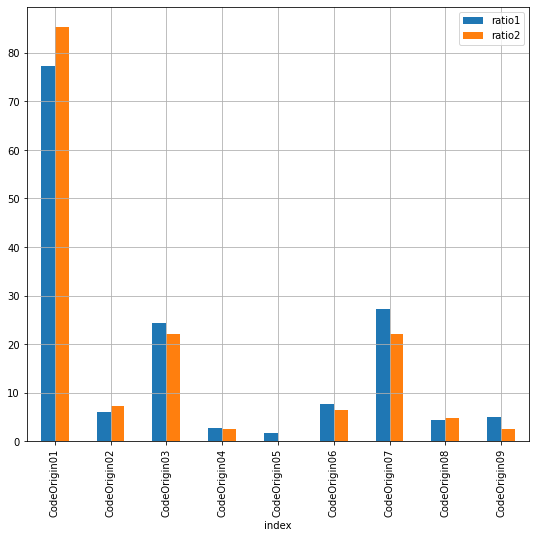

In [46]:
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
import datetime


Q1.plot(x="index", y=["ratio1", "ratio2"], kind="bar",figsize=(9,8))
plt.grid()
plt.show()


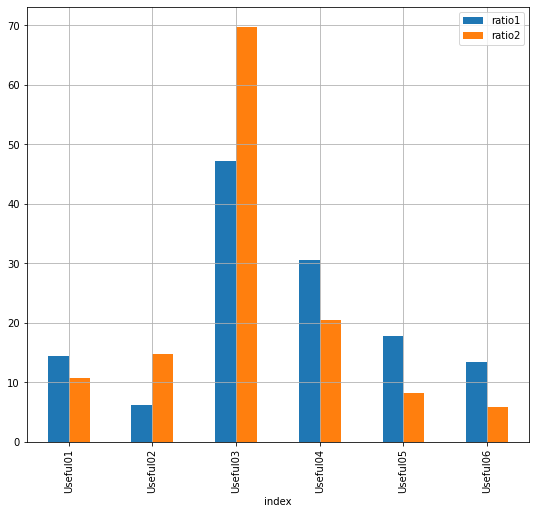

In [47]:
Q2.plot(x="index", y=["ratio1", "ratio2"], kind="bar",figsize=(9,8))
plt.grid()
plt.show()


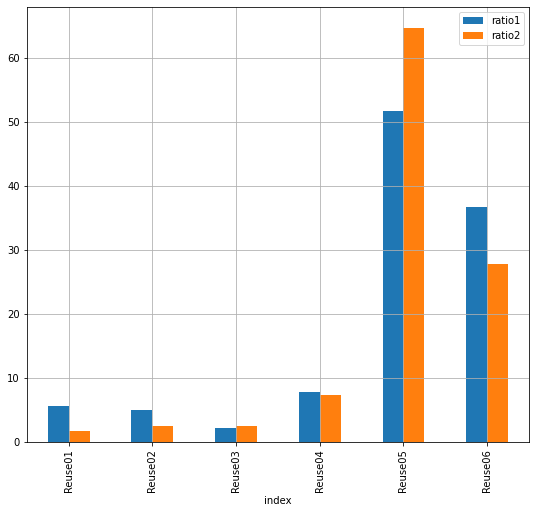

In [48]:
Q3.plot(x="index", y=["ratio1", "ratio2"], kind="bar",figsize=(9,8))
plt.grid()
plt.show()


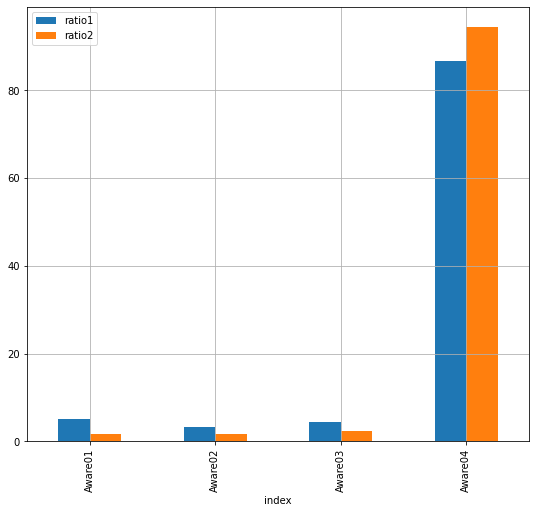

In [49]:
Q4.plot(x="index", y=["ratio1", "ratio2"], kind="bar",figsize=(9,8))
plt.grid()
plt.show()


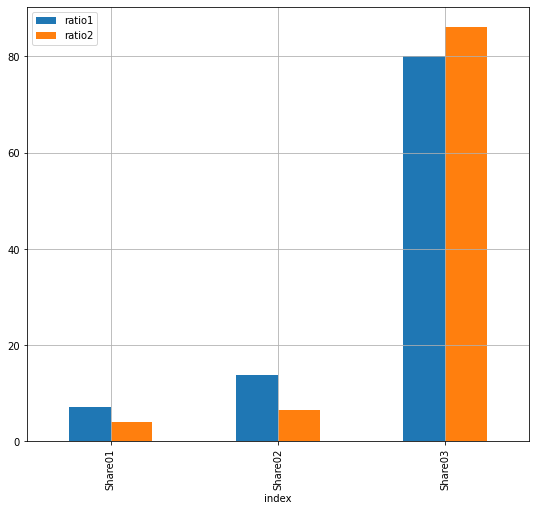

In [50]:
Q5.plot(x="index", y=["ratio1", "ratio2"], kind="bar",figsize=(9,8))
plt.grid()
plt.show()


### Part3

In [51]:
Survey1DF[['Token','Gender']].groupby('Gender').count().reset_index()[['Gender']].replace(to_replace=[1, 2,3,4], value=['Female', 'Male','Prefer not to say','Non-Binary'])['Gender']



0               Female
1                 Male
2    Prefer not to say
3           Non-Binary
Name: Gender, dtype: object

<Figure size 2400x1000 with 0 Axes>

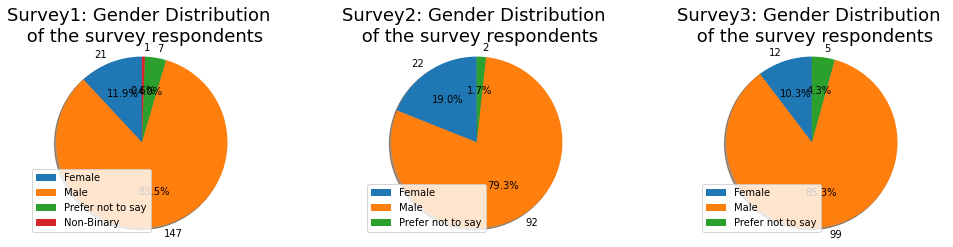

In [52]:
from matplotlib.pyplot import figure
from matplotlib import pyplot as plt 
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
perc1 = Survey1DF[['Token','Gender']].groupby('Gender').count()['Token'].to_numpy()
perc2 = Survey2DF[['Token','Gender']].groupby('Gender').count()['Token'].to_numpy()
perc3 = Survey3DF[['Token','Gender']].groupby('Gender').count()['Token'].to_numpy()


sizes1 = Survey1DF[['Token','Gender']].groupby('Gender').count()['Token'].to_numpy() # [17,82,1]
sizes2 = Survey2DF[['Token','Gender']].groupby('Gender').count()['Token'].to_numpy() # [16,129,6,1]
sizes3 = Survey3DF[['Token','Gender']].groupby('Gender').count()['Token'].to_numpy() # [16,129,6,1]

explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

figure(figsize=(24, 10), dpi=100, facecolor='w', edgecolor='k')


fig1, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig1.set_figheight(5)
fig1.set_figwidth(15)
fig1.tight_layout(pad=7.5)

ax1.pie(sizes1, labels=perc1, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax2.pie(sizes2, labels=perc2, autopct='%1.1f%%', shadow=True, startangle=90)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax3.pie(sizes3, labels=perc3, autopct='%1.1f%%', shadow=True, startangle=90)
ax3.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax1.set_title('Survey1: Gender Distribution \n of the survey respondents',size=18)
ax2.set_title('Survey2: Gender Distribution \n of the survey respondents',size=18)
ax3.set_title('Survey3: Gender Distribution \n of the survey respondents',size=18)

labels1 = Survey1DF[['Token','Gender']].groupby('Gender').count().reset_index()[['Gender']].replace(to_replace=[1, 2,3,4], value=['Female', 'Male','Prefer not to say','Non-Binary'])['Gender']
labels2 = Survey2DF[['Token','Gender']].groupby('Gender').count().reset_index()[['Gender']].replace(to_replace=[1, 2,3,4], value=['Female', 'Male','Prefer not to say','Non-Binary'])['Gender']
labels3 = Survey3DF[['Token','Gender']].groupby('Gender').count().reset_index()[['Gender']].replace(to_replace=[1, 2,3,4], value=['Female', 'Male','Prefer not to say','Non-Binary'])['Gender']

ax1.legend(loc='best', labels=labels1)
ax2.legend(loc='best', labels=labels2)
ax3.legend(loc='best', labels=labels3)


plt.show()

In [53]:
Survey1DF.to_csv('Survey1DFCleaned.csv', index=False)
Survey2DF.to_csv('Survey2DFCleaned.csv', index=False)
Survey3DF.to_csv('Survey3DFCleaned.csv', index=False)

In [54]:
Survey1DF

,Response ID,DateSubmitted,LastPage,StartLanguage,Token,CommitAuthor,CodeOrigin01,CodeOrigin02,CodeOrigin03,CodeOrigin04,CodeOrigin05,CodeOrigin06,CodeOrigin07,CodeOrigin08,CodeOrigin09,CodeOrigin10,Useful01,Useful02,Useful03,Useful04,Useful05,Useful06,Useful07,Reuse01,Reuse02,Reuse03,Reuse04,Reuse05,Reuse06,Reuse07,Aware01,Aware02,Aware03,Aware04,Aware05,Share01,Share02,Share03,Share04,Sat01,Sat02,Sat03,Sat04,Sat05,Intention01,Intention02,Intention03,RecallReuse,AgeGroup,Gender,Minority,Experience,MeanScaledSatV,MeanScaledIntV
0,1,1980-01-01 00:00:00,4.0,en,BsfZww05Po1xkqA,1,1,1,1,1,0,0,0,0,0,NaN,0,0,0,0,1,0,NaN,1,0,1,1,0,0,NaN,0,0,0,1,NaN,0,0,1,NaN,5,5.0,5,5.0,3.0,5.0,2.0,5.0,1,2,2.0,1,5.0,5.00,4.0
1,3,1980-01-01 00:00:00,4.0,en,B1FXzNmisG6wFFU,1,0,0,0,0,0,0,0,0,1,NaN,0,0,0,0,1,0,NaN,0,0,0,0,0,1,NaN,0,0,0,1,NaN,0,0,1,NaN,4,4.0,4,4.0,2.0,1.0,1.0,1.0,Not Sure,1,1.0,1,1.0,4.00,1.0
2,4,1980-01-01 00:00:00,4.0,en,qEdFz5StzMXcxHa,1,1,0,0,0,0,0,0,0,0,NaN,0,0,0,0,1,0,NaN,1,0,0,0,0,0,NaN,0,0,0,1,NaN,0,0,1,NaN,5,5.0,4,5.0,4.0,1.0,1.0,1.0,Not Sure,2,2.0,Rather not say,2.0,4.75,1.0
3,10,1980-01-01 00:00:00,4.0,en,wd7XrdPoomWc0DH,1,1,0,0,0,0,0,1,0,0,NaN,0,0,1,0,0,0,NaN,0,0,0,0,0,1,NaN,0,0,0,1,NaN,1,0,0,NaN,5,5.0,5,5.0,1.0,5.0,5.0,5.0,Not Sure,2,1.0,0,1.0,5.00,5.0
4,31,1980-01-01 00:00:00,4.0,en,V5xlTIQ1kJbz3DM,1,1,0,1,0,0,0,1,0,0,NaN,0,0,1,1,0,0,NaN,0,0,0,0,1,0,NaN,0,0,0,1,NaN,0,0,1,NaN,4,4.0,5,5.0,2.0,1.0,1.0,1.0,1,2,2.0,0,5.0,4.50,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,548,1980-01-01 00:00:00,4.0,en,sobK2qTYPg6TFvA,1,1,1,0,1,0,0,1,0,0,NaN,0,0,1,1,0,0,NaN,0,0,0,1,0,0,NaN,0,0,0,1,NaN,0,1,0,NaN,4,4.0,3,3.0,2.0,1.0,1.0,1.0,1,1,1.0,0,2.0,3.50,1.0
174,555,1980-01-01 00:00:00,4.0,en,CclUF74vSBYZLkz,1,1,0,0,0,0,0,0,0,0,NaN,0,0,0,1,0,0,NaN,1,0,0,1,0,0,NaN,1,0,0,0,NaN,0,0,1,NaN,5,5.0,3,4.0,1.0,2.0,2.0,5.0,1,2,1.0,1,3.0,4.25,3.0
175,556,1980-01-01 00:00:00,4.0,en,qkVzPJU6PiGsfN5,1,1,0,1,0,0,0,1,1,0,Datasets from The Fake News Competition (FNC),0,0,1,0,0,0,NaN,0,0,0,0,1,0,NaN,0,0,1,0,NaN,0,1,0,NaN,5,5.0,5,5.0,4.0,1.0,1.0,1.0,1,1,2.0,0,4.0,5.00,1.0
176,557,1980-01-01 00:00:00,4.0,en,x4aOsTO0SznHdVe,1,0,0,0,0,0,1,0,0,0,NaN,0,0,0,0,1,0,NaN,0,0,0,0,0,1,NaN,0,0,0,1,NaN,0,0,1,NaN,5,5.0,5,5.0,1.0,2.0,2.0,2.0,1,2,2.0,0,NaN,5.00,2.0


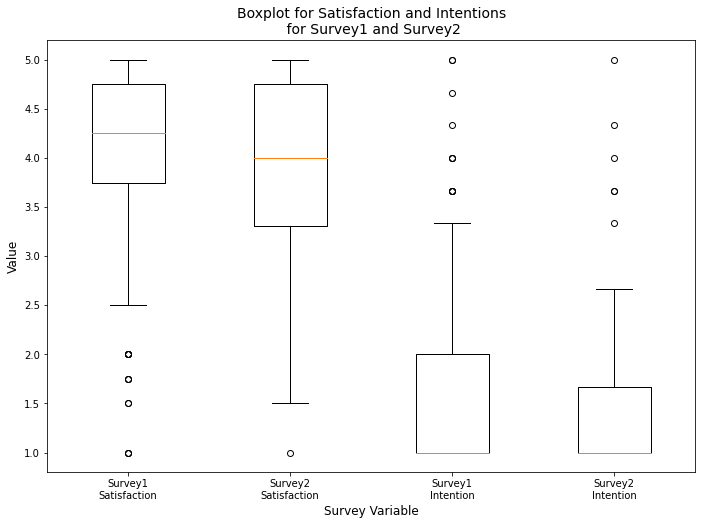

In [55]:
# Import libraries
import matplotlib.pyplot as plt 
 
# Creating dataset
data_1 = Survey1DF['MeanScaledSatV'].dropna()
data_2 = Survey2DF['MeanScaledSatV'].dropna()
data_3 = Survey1DF['MeanScaledIntV'].dropna()
data_4 = Survey2DF['MeanScaledIntV'].dropna()
data = [data_1, data_2, data_3, data_4]
 
fig = plt.figure(figsize =(9, 6))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

ax.set_xlabel('Survey Variable', fontsize=12)
ax.set_ylabel('Value', fontsize=12)
ax.set_title('Boxplot for Satisfaction and Intentions\n for Survey1 and Survey2', fontsize=14)
 
# Creating plot
bp = ax.boxplot(data)
plt.xticks([1, 2, 3, 4], ['Survey1\nSatisfaction', 'Survey2\nSatisfaction', 'Survey1\nIntention', 'Survey2\nIntention'])

# show plot
plt.show()

In [56]:
len(Survey1DF[(Survey1DF['CodeOrigin01'] == 1) & (Survey1DF['CodeOrigin02'] == 1)])

4

In [57]:
xx = ['CodeOrigin01', 'CodeOrigin02', 'CodeOrigin03',
       'CodeOrigin04', 'CodeOrigin05', 'CodeOrigin06', 'CodeOrigin07',
       'CodeOrigin08', 'CodeOrigin09']

df = pd.DataFrame()

for i, vali in enumerate(xx):
    for j, valj in enumerate(xx[i:]):
        countx= len(Survey1DF[(Survey1DF[vali] == 1) & (Survey1DF[valj] == 1)])
        dictx = {'EntityX': vali, 'EntityY': valj, 'count': countx}
        df = df.append(dictx, ignore_index = True)
        print('i=',vali,' j= ',valj, 'count=', countx)


i= CodeOrigin01  j=  CodeOrigin01 count= 139
i= CodeOrigin01  j=  CodeOrigin02 count= 4
i= CodeOrigin01  j=  CodeOrigin03 count= 33
i= CodeOrigin01  j=  CodeOrigin04 count= 4
i= CodeOrigin01  j=  CodeOrigin05 count= 1
i= CodeOrigin01  j=  CodeOrigin06 count= 6
i= CodeOrigin01  j=  CodeOrigin07 count= 39
i= CodeOrigin01  j=  CodeOrigin08 count= 6
i= CodeOrigin01  j=  CodeOrigin09 count= 2
i= CodeOrigin02  j=  CodeOrigin02 count= 11
i= CodeOrigin02  j=  CodeOrigin03 count= 2
i= CodeOrigin02  j=  CodeOrigin04 count= 2
i= CodeOrigin02  j=  CodeOrigin05 count= 1
i= CodeOrigin02  j=  CodeOrigin06 count= 2
i= CodeOrigin02  j=  CodeOrigin07 count= 2
i= CodeOrigin02  j=  CodeOrigin08 count= 1
i= CodeOrigin02  j=  CodeOrigin09 count= 0
i= CodeOrigin03  j=  CodeOrigin03 count= 44
i= CodeOrigin03  j=  CodeOrigin04 count= 4
i= CodeOrigin03  j=  CodeOrigin05 count= 0
i= CodeOrigin03  j=  CodeOrigin06 count= 3
i= CodeOrigin03  j=  CodeOrigin07 count= 19
i= CodeOrigin03  j=  CodeOrigin08 count= 4
i= C

In [58]:
for idx, val in enumerate(xx):
    print(idx)

0
1
2
3
4
5
6
7
8


In [59]:
df

,EntityX,EntityY,count
0,CodeOrigin01,CodeOrigin01,139.0
1,CodeOrigin01,CodeOrigin02,4.0
2,CodeOrigin01,CodeOrigin03,33.0
3,CodeOrigin01,CodeOrigin04,4.0
4,CodeOrigin01,CodeOrigin05,1.0
5,CodeOrigin01,CodeOrigin06,6.0
6,CodeOrigin01,CodeOrigin07,39.0
7,CodeOrigin01,CodeOrigin08,6.0
8,CodeOrigin01,CodeOrigin09,2.0
9,CodeOrigin02,CodeOrigin02,11.0


In [60]:
# !pip install pyvis

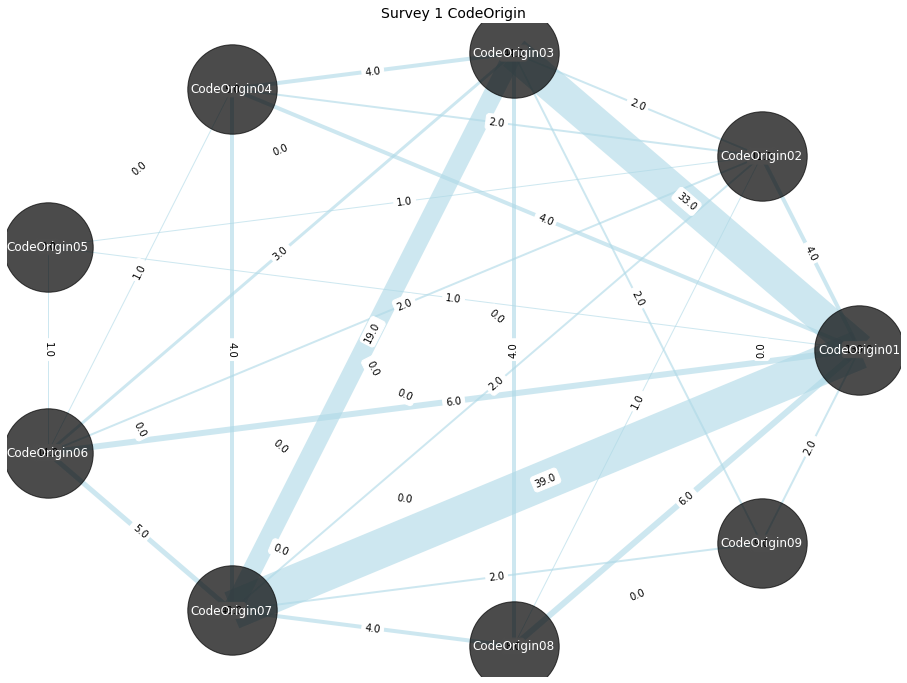

In [76]:
import networkx as nx
from matplotlib import pyplot as plt

G = nx.from_pandas_edgelist(df, 'EntityX', 'EntityY', 'count')

widths = nx.get_edge_attributes(G, 'count')
nodelist = G.nodes()

plt.figure(figsize=(16,12))
ax = plt.gca()
ax.set_title('Survey 1 CodeOrigin', fontsize=14)

pos = nx.shell_layout(G)
nx.draw_networkx_nodes(G,pos,
                       nodelist=nodelist,
                       node_size=8000,
                       node_color='black',
                       alpha=0.7)
nx.draw_networkx_edges(G,pos,
                       edgelist = widths.keys(),
                       width=list(widths.values()),
                       edge_color='lightblue',
                       label='1111111',
                       alpha=0.6)
nx.draw_networkx_labels(G, pos=pos,
                        labels=dict(zip(nodelist,nodelist)),
                        font_color='white')

nx.draw_networkx_edge_labels(G, pos=pos,
                             edge_labels = widths)

plt.box(False)
plt.show()